# The Real Generalized PSF Finder - jk this is broken

This has been a long time coming (it feels like lol) but below is the -- so far -- normalized and shifted wavelengths and corresponding flux values for Tau Ceti star. Time to find the PSF value for this bad boy.

In [12]:
from scipy.optimize import curve_fit
import random

from astropy.io import fits
import numpy as np
import scipy.interpolate
from scipy.interpolate import splev, splrep

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [10]:
import pandas as pd

In [36]:
#reading in alpha shifted values:

data = pd.read_csv("C:\\Users\\alica\\workspace\\Intro-2-Spectra\\analysis\\NEID_analysis\\alpha_tau_ceti_shifted_values.csv")
pd.set_option('display.max_rows', 10)
display(data)

,Unnamed: 0,shifted wavelengths,shifted fluxs
0,0,[4020.56610385 4020.57951501 4020.59292622 ......,[0.62022389 0.60594888 0.58925493 ... 0.657996...
1,1,[4047.36164688 4047.37514743 4047.38864802 ......,[0.70525603 0.53839194 0.596527 ... 0.753954...
2,2,[4074.54993908 4074.56353032 4074.5771216 ......,[0.94266745 0.83923604 0.69511585 ... 0.962318...
3,3,[4102.07150221 4102.08518524 4102.09886833 ......,[0.25037037 0.50924703 0.26848231 ... 0.650823...
4,4,[4129.96984742 4129.98362352 4129.99739966 ......,[0.55137117 0.47534296 0.44582643 ... 0.844829...
...,...,...,...
20,20,[4634.44636702 4634.46182587 4634.47728477 ......,[1.03652272 0.88343208 0.88761193 ... 1.034561...
21,21,[4670.09780023 4670.113378 4670.12895582 ......,[0.70412481 0.66756874 0.77346294 ... 0.867277...
22,22,[4706.30629579 4706.32199434 4706.33769294 ......,[0.82203063 0.82631417 0.95597229 ... 0.934816...
23,23,[4743.07683161 4743.09265281 4743.10847407 ......,[0.78141367 0.87857109 0.8929465 ... 0.858571...


24 seems like a pretty large starting point, so lets start with just the first one and see how that goes

In [29]:
#reading in data: 
wls  = data['shifted wavelengths'] #array of all wls
fls = data['shifted fluxs']

In [30]:
#error! they arent gonna work like this ugh, they didnt store as arrays, but as just a bunch of values that arent separated by commas

ValueError: Unrecognized character [ in format string

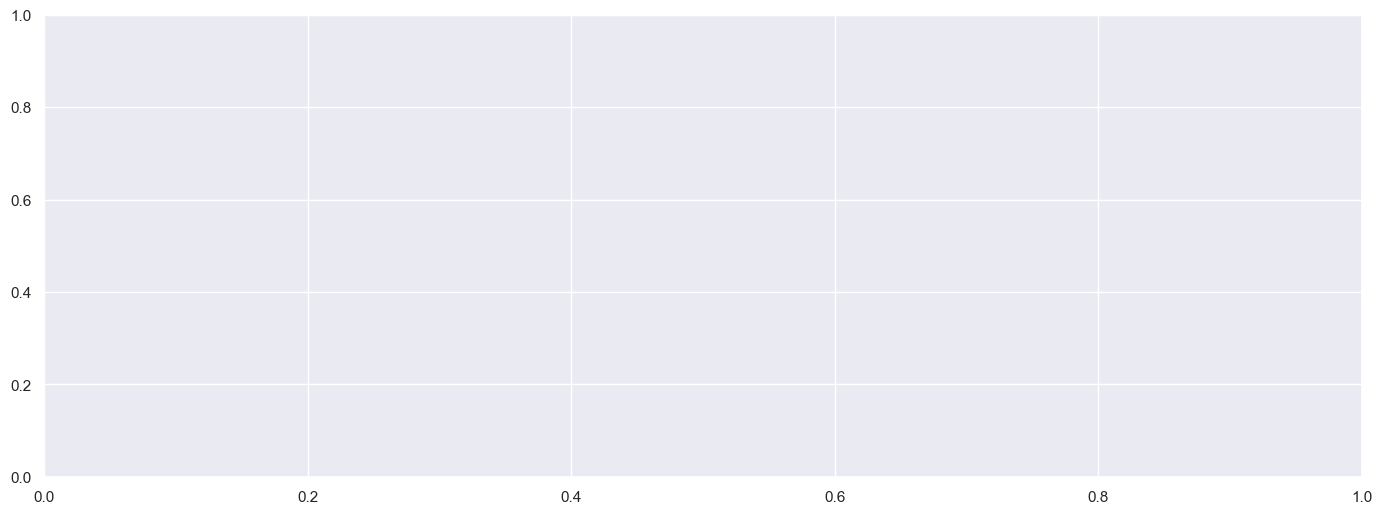

In [31]:
#visualization:
wl = wls[0]
fl = fls[0]
plt.figure(figsize = (17,6))
plt.plot(wl,fl)
plt.xlabel('wavelength (A)')
plt.ylabel('Normalized flux')
plt.title('Normalized Flux of Tau Ceti')
#plt.xlim(5884,5902)
plt.show()

In [32]:
wls[:][0]

'[4020.56610385 4020.57951501 4020.59292622 ... 4096.51097249 4096.52463698\n 4096.53830151]'

In [23]:
for i in wls[0]:
    print(i)

[
4
0
2
0
.
5
6
6
1
0
3
8
5
 
4
0
2
0
.
5
7
9
5
1
5
0
1
 
4
0
2
0
.
5
9
2
9
2
6
2
2
 
.
.
.
 
4
0
9
6
.
5
1
0
9
7
2
4
9
 
4
0
9
6
.
5
2
4
6
3
6
9
8


 
4
0
9
6
.
5
3
8
3
0
1
5
1
]
